# Predicting if income exceeds $50,000 per year

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
salary_data = pd.read_csv('salary_data.csv')
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_data.shape

(32561, 15)

In [4]:
salary_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')


The salary dataset has 32,561 entries. Each entry contains the following information
about an individual:
- age​: the age of an individual
    - Integer greater than 0
- workclass​: a general term to represent the employment status of an individual
    - Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.
- fnlwgt​: final weight. In other words, this is the number of people the census believes
the entry represents..
    - Integer greater than 0
- education​: the highest level of education achieved by an individual.
    - Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.
- education­num​: the highest level of education achieved in numerical form.
    - Integer greater than 0
- marital­status​: marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
    - Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.
- occupation​: the general type of occupation of an individual
-  Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.
- relationship​: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all
    - Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.
- race​: Descriptions of an individual’s race
    - White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.
- sex​: the biological sex of the individual
    - Male, Female
- capital­gain​: capital gains for an individual
    - Integer greater than or equal to 0
- capital­loss​: capital loss for an individual
    - Integer greater than or equal to 0
- hours­per­week​: the hours an individual has reported to work per week
    - continuous.
- native­country​: country of origin for an individual
    - United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.
- salary: whether or not an individual makes more than $50,000 annually.
    - <=50k, >50

In [5]:
salary_data.columns = salary_data.columns.str.strip().str.replace("-", "_").str.lower()
salary_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

(0         2174
 1            0
 2            0
 3            0
 4            0
          ...  
 32556        0
 32557        0
 32558        0
 32559        0
 32560    15024
 Name: capital_gain, Length: 32561, dtype: int64,
 <seaborn.axisgrid.FacetGrid at 0x1da989e56a0>)

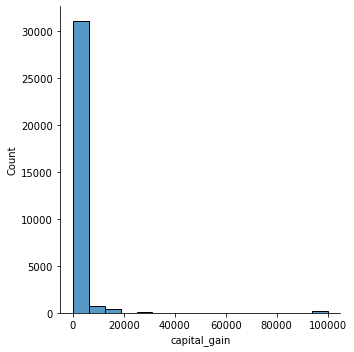

In [6]:
salary_data['capital_gain'], sns.displot(salary_data.capital_gain)


C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain'>

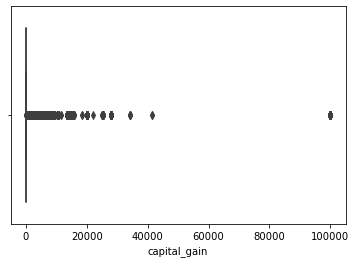

In [7]:
 sns.boxplot(salary_data.capital_gain)

In [8]:
salary_data.capital_gain = np.where(salary_data.capital_gain == 0, np.nan, salary_data.capital_gain)
salary_data.capital_gain

0         2174.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
32556        NaN
32557        NaN
32558        NaN
32559        NaN
32560    15024.0
Name: capital_gain, Length: 32561, dtype: float64

In [9]:
salary_data.capital_gain = np.log(salary_data.capital_gain)
salary_data.capital_gain

0        7.684324
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
32556         NaN
32557         NaN
32558         NaN
32559         NaN
32560    9.617404
Name: capital_gain, Length: 32561, dtype: float64

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0        7.684324
 1        0.000000
 2        0.000000
 3        0.000000
 4        0.000000
            ...   
 32556    0.000000
 32557    0.000000
 32558    0.000000
 32559    0.000000
 32560    9.617404
 Name: capital_gain, Length: 32561, dtype: float64,
 <AxesSubplot:xlabel='capital_gain'>)

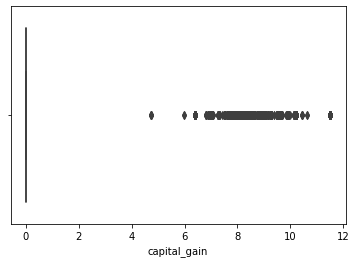

In [10]:
salary_data.capital_gain = salary_data.capital_gain.replace(np.nan, 0)
salary_data.capital_gain, sns.boxplot(salary_data.capital_gain)

In [11]:
salary_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


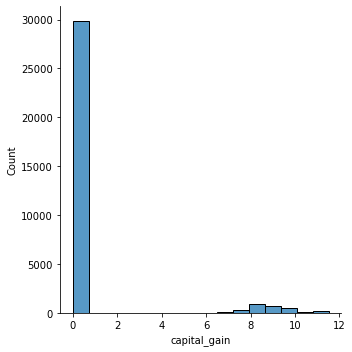

In [12]:
sns.displot(salary_data.capital_gain)

In [13]:
salary_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [14]:
salary_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [15]:
salary_data.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

# Removing outliers from hours_per_week column


In [16]:
salary_data.hours_per_week

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: hours_per_week, Length: 32561, dtype: int64

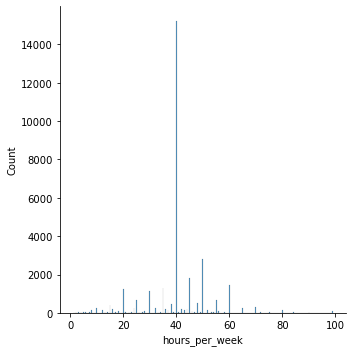

In [17]:
sns.displot(salary_data, x = 'hours_per_week')

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

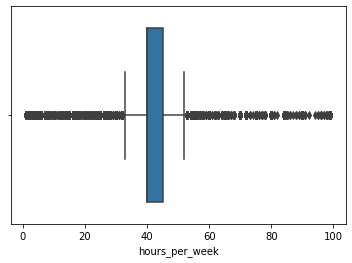

In [18]:
sns.boxplot(salary_data.hours_per_week)

In [19]:
salary_data.hours_per_week.quantile(0.75), salary_data.hours_per_week.quantile(0.25)

(45.0, 40.0)

In [20]:
salary_data.hours_per_week.quantile([0.25, 0.75])

0.25    40.0
0.75    45.0
Name: hours_per_week, dtype: float64

In [21]:
IQR = salary_data.hours_per_week.quantile(0.75) - salary_data.hours_per_week.quantile(0.25)
IQR

5.0

In [22]:
lower_range = salary_data.hours_per_week.quantile(0.25) - (1.5 * IQR)
upper_range = salary_data.hours_per_week.quantile(0.75) + (1.5 * IQR)

lower_range, upper_range

(32.5, 52.5)

In [23]:
salary_data.loc[salary_data.hours_per_week <= lower_range, 'hours_per_week'] = lower_range

In [24]:
salary_data.loc[salary_data.hours_per_week >= upper_range, 'hours_per_week'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

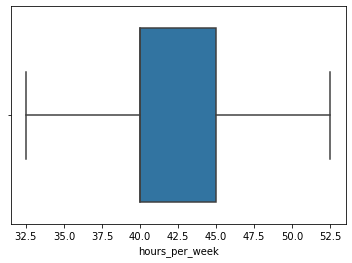

In [25]:
sns.boxplot(salary_data.hours_per_week)


# Removing outliers from education_num

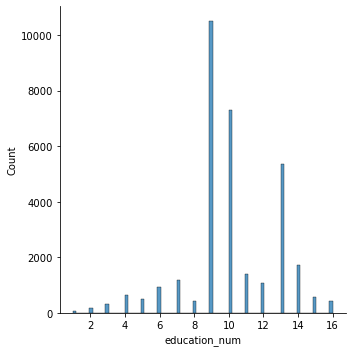

In [26]:
sns.displot(salary_data['education_num'])

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

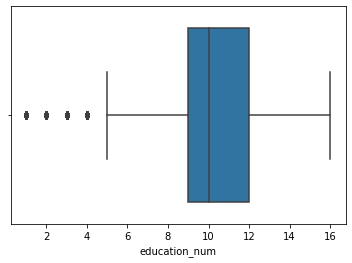

In [27]:
sns.boxplot(salary_data.education_num)

In [28]:
IQR = salary_data['education_num'].quantile(0.75) - salary_data['education_num'].quantile(0.25)
    
lower_range = salary_data['education_num'].quantile(0.25) - (1.5 * IQR)
upper_range = salary_data['education_num'].quantile(0.75) + (1.5 * IQR)
    
salary_data.loc[salary_data['education_num'] <= lower_range, 'education_num'] = lower_range
salary_data.loc[salary_data['education_num'] >= upper_range, 'education_num'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

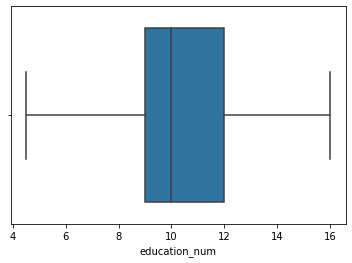

In [29]:
sns.boxplot(salary_data.education_num)

# Removing outliers from capital_loss

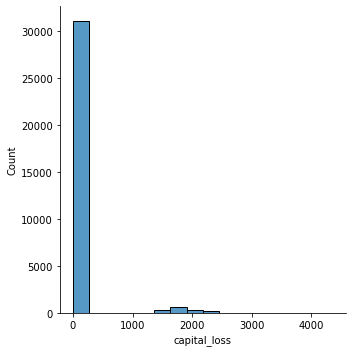

In [30]:
sns.displot(salary_data.capital_loss)

In [31]:
salary_data.capital_loss

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital_loss, Length: 32561, dtype: int64

In [32]:
salary_data.capital_loss = np.where(salary_data.capital_loss == 0, np.nan, salary_data.capital_loss)
salary_data.capital_loss = np.log(salary_data.capital_loss)
salary_data.capital_loss = salary_data.capital_loss.replace(np.nan, 0)

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss', ylabel='Density'>

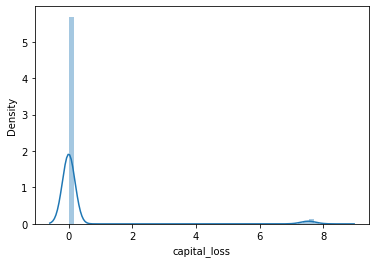

In [33]:
sns.distplot(salary_data.capital_loss)

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

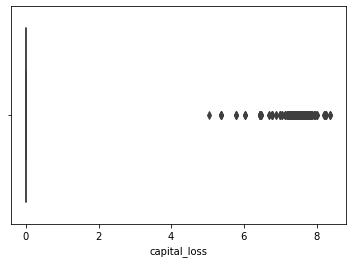

In [34]:
sns.boxplot(salary_data.capital_loss)

In [35]:
IQR = salary_data.capital_loss.quantile(0.75) - salary_data.capital_loss.quantile(0.25)
    
lower_range = salary_data.capital_loss.quantile(0.25) - (1.5 * IQR)
upper_range = salary_data.capital_loss.quantile(0.75) + (1.5 * IQR)
    
salary_data.loc[salary_data.capital_loss <= lower_range, 'capital_loss'] = lower_range
salary_data.loc[salary_data.capital_loss >= upper_range, 'capital_loss'] = upper_range

C:\Users\ramch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

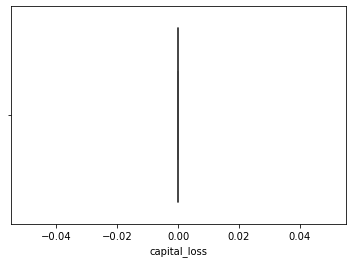

In [36]:
sns.boxplot(salary_data.capital_loss)

# Feature Engineering

In [37]:
salary_data.sex.unique()

array([' Male', ' Female'], dtype=object)

In [38]:
# Convert sex column as follows
# - male -> 1
# - else -> 0
salary_data.sex = np.where(salary_data.sex == "Male", 1, 0)

In [39]:
salary_data.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [40]:
# label encoding in race column
# {0: white, 1: black, 2: Asian-Pac-Islander, 3: Amer-Indian-Eskimo, 4: other
label_enco_race = {value: key for key, value in enumerate(salary_data.race.unique())}
label_enco_race

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [41]:
salary_data.race = salary_data.race.map(label_enco_race)
salary_data.race


0        0
1        0
2        0
3        1
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: race, Length: 32561, dtype: int64

In [42]:
salary_data.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [43]:
## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
label_enco_relationship = {value: key for key, value in enumerate(salary_data.relationship.unique())}
label_enco_relationship

{' Not-in-family': 0,
 ' Husband': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [44]:
salary_data.relationship = salary_data.relationship.map(label_enco_relationship)
salary_data.relationship

0        0
1        1
2        0
3        1
4        2
        ..
32556    2
32557    1
32558    4
32559    3
32560    2
Name: relationship, Length: 32561, dtype: int64

In [45]:
salary_data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [46]:
label_enco_occupation = {value: key for key, value in enumerate(salary_data.occupation.unique())}
label_enco_occupation

{' Adm-clerical': 0,
 ' Exec-managerial': 1,
 ' Handlers-cleaners': 2,
 ' Prof-specialty': 3,
 ' Other-service': 4,
 ' Sales': 5,
 ' Craft-repair': 6,
 ' Transport-moving': 7,
 ' Farming-fishing': 8,
 ' Machine-op-inspct': 9,
 ' Tech-support': 10,
 ' ?': 11,
 ' Protective-serv': 12,
 ' Armed-Forces': 13,
 ' Priv-house-serv': 14}

In [47]:
salary_data.occupation = salary_data.occupation.map(label_enco_occupation)
salary_data.occupation

0         0
1         1
2         2
3         2
4         3
         ..
32556    10
32557     9
32558     0
32559     0
32560     1
Name: occupation, Length: 32561, dtype: int64

In [48]:
salary_data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [49]:
label_enco_marital_status = {value: key for key, value in enumerate(salary_data.marital_status.unique())}
label_enco_marital_status

{' Never-married': 0,
 ' Married-civ-spouse': 1,
 ' Divorced': 2,
 ' Married-spouse-absent': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [50]:
salary_data.marital_status = salary_data.marital_status.map(label_enco_marital_status)
salary_data.marital_status

0        0
1        1
2        2
3        1
4        1
        ..
32556    1
32557    1
32558    6
32559    0
32560    1
Name: marital_status, Length: 32561, dtype: int64

In [51]:
salary_data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [52]:
label_enco_education = {value: key for key, value in enumerate(salary_data.education.unique()) }
label_enco_education

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [53]:
salary_data.education = salary_data.education.map(label_enco_education)
salary_data.education

0        0
1        0
2        1
3        2
4        0
        ..
32556    6
32557    1
32558    1
32559    1
32560    1
Name: education, Length: 32561, dtype: int64

In [54]:
salary_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [55]:
salary_data.workclass = np.where(salary_data.workclass == ' ?', ' Missing', salary_data.workclass)
salary_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Missing', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [56]:
label_enco_workclass = {value: key for key, value in enumerate(salary_data.workclass.unique())}
label_enco_workclass

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Missing': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [57]:
salary_data.workclass = salary_data.workclass.map(label_enco_workclass)
salary_data.workclass

0        0
1        1
2        2
3        2
4        2
        ..
32556    2
32557    2
32558    2
32559    2
32560    6
Name: workclass, Length: 32561, dtype: int64

In [58]:
salary_data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [59]:
label_enco_country = {value: key for key, value in enumerate(salary_data.native_country.unique())}
label_enco_country

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' ?': 4,
 ' Mexico': 5,
 ' South': 6,
 ' Puerto-Rico': 7,
 ' Honduras': 8,
 ' England': 9,
 ' Canada': 10,
 ' Germany': 11,
 ' Iran': 12,
 ' Philippines': 13,
 ' Italy': 14,
 ' Poland': 15,
 ' Columbia': 16,
 ' Cambodia': 17,
 ' Thailand': 18,
 ' Ecuador': 19,
 ' Laos': 20,
 ' Taiwan': 21,
 ' Haiti': 22,
 ' Portugal': 23,
 ' Dominican-Republic': 24,
 ' El-Salvador': 25,
 ' France': 26,
 ' Guatemala': 27,
 ' China': 28,
 ' Japan': 29,
 ' Yugoslavia': 30,
 ' Peru': 31,
 ' Outlying-US(Guam-USVI-etc)': 32,
 ' Scotland': 33,
 ' Trinadad&Tobago': 34,
 ' Greece': 35,
 ' Nicaragua': 36,
 ' Vietnam': 37,
 ' Hong': 38,
 ' Ireland': 39,
 ' Hungary': 40,
 ' Holand-Netherlands': 41}

In [60]:
salary_data.native_country = salary_data.native_country.map(label_enco_country)
salary_data.native_country.head()

0    0
1    0
2    0
3    0
4    1
Name: native_country, dtype: int64

In [61]:
salary_data.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [62]:
label_enco_salary = {value: key for key, value in enumerate(salary_data.salary.unique())}
label_enco_salary

{' <=50K': 0, ' >50K': 1}

In [63]:
salary_data.salary = salary_data.salary.map(label_enco_salary)
salary_data.salary.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

<AxesSubplot:>

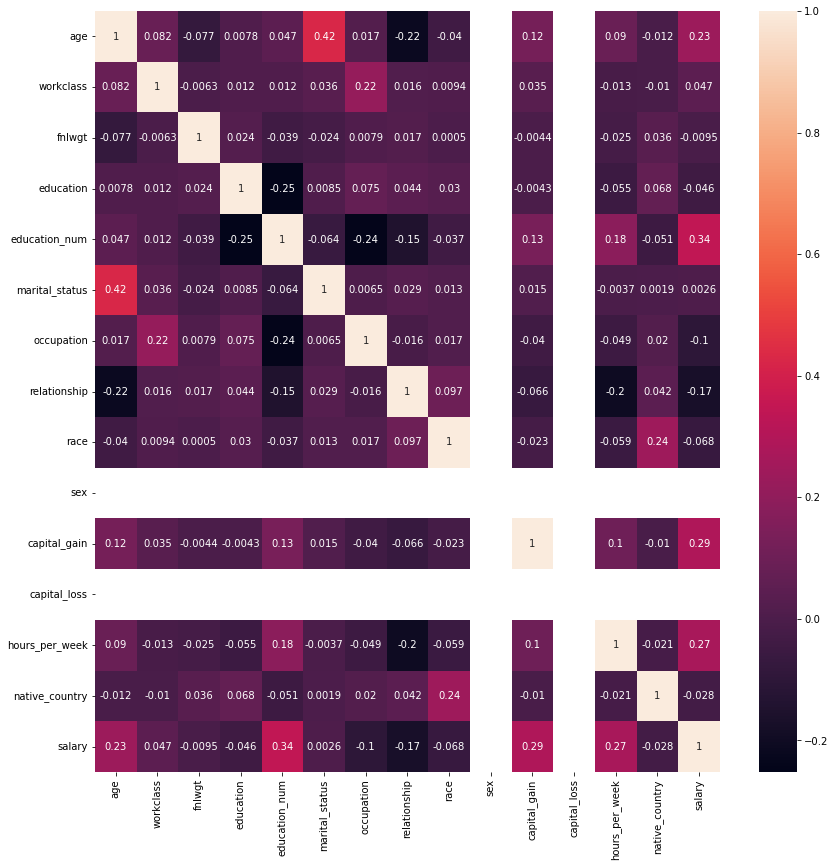

In [64]:
plt.figure(figsize = (14, 14))
corr = salary_data.corr()
sns.heatmap(corr, annot = True)

In [65]:
salary_data = salary_data.drop('fnlwgt', axis=1)

In [66]:
salary_data.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [67]:
salary_data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,0.0,40.0,1,0


In [68]:
salary_data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
32556,27,2,6,12.0,1,10,2,0,0,0.000000,0.0,38.0,0,0
32557,40,2,1,9.0,1,9,1,0,0,0.000000,0.0,40.0,0,1
32558,58,2,1,9.0,6,0,4,0,0,0.000000,0.0,40.0,0,0
32559,22,2,1,9.0,0,0,3,0,0,0.000000,0.0,32.5,0,0
32560,52,6,1,9.0,1,1,2,0,0,9.617404,0.0,40.0,0,1


# train_test_split

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [70]:
sc = StandardScaler()

In [71]:
salary_data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'salary'],
      dtype='object')

In [72]:
X = salary_data[['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']]

In [73]:
y = salary_data.salary

In [74]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [75]:
X = sc.fit_transform(X)

In [76]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print('Train data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Train data shape: (26048, 13)
Test data shape: (6513, 13)


In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lg_model = LogisticRegression()

In [81]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [82]:
y_pred = lg_model.predict(X_test)

In [83]:
results = {
    'Actual': y_test,
    'Predicted': y_pred
}

In [84]:
pd.DataFrame(results)

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,0
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [86]:
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matix: \n{}'.format(confusion_matrix(y_test, y_pred)))
print('Classification Report:\n {}'.format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8083832335329342
Confusion Matix: 
[[4624  318]
 [ 930  641]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4942
           1       0.67      0.41      0.51      1571

    accuracy                           0.81      6513
   macro avg       0.75      0.67      0.69      6513
weighted avg       0.79      0.81      0.79      6513

